## MAT 321 - PS4

Author: Marc Aurèle Gilles

* You can (and probably should) discuss assignments with others, Qinxin and me, but you must write and understand any solutions/code that you submit. You can consult any resource you want for this homework, but you should cite sources you used.
* You must upload the assignment to Canvas before the deadline: 04/17/2023 at 11:59pm.


# Q1 Diagonalization of circulant matrices.


In these problems sets, we have used repeatedly that circulant matrices are diagonalized by the DFT to:
* derive fast mat-vecs with circulant and Toeplitz matrices
* derive fast solvers for circulant and perturbed circulant systems
* deblur large datasets of images

That is, we used the fact that:
$$C = F^{-1} \Lambda F $$
where $F$ is the DFT matrix, and $\text{diag}(\Lambda) = Fc$. The goal of is this exercise is to prove this identity.

Note that this is an eigendecomposition of $C$, where $V = F^{-1}$ is the matrix of eigenvectors. Recall that the DFT matrix is 
$$
F = \frac{1}{\sqrt{n}} \begin{bmatrix}
1 & 1 & 1 & 1 & \cdots & 1    \\
1 & \omega & \omega^2 &  \omega^3 & \cdots & \omega^{n-1}    \\
1 & \omega^2 & \omega^4 &  \omega^6 & \cdots & \omega^{2(n-1)}    \\
1 & \omega^3 & \omega^6 &  \omega^9 & \cdots & \omega^{2(n-1)}    \\
\vdots & \vdots & \vdots & \vdots  & \ddots & \ddots   \\
1 & \omega^{n-1} & \omega^{2(n-1)} & \omega^{3(n-1)}  & \cdots & \omega^{(n-1)(n-1)}    \\
\end{bmatrix}
$$
where $\omega = \exp(- \imath 2 \pi / n) $, $\imath^2 = -1$ (note that $\omega$ depends on $n$).
Also recall that $F$ (with this normalization) is unitary, that is $F^{-1} = F^* = \bar{F}^T$, and $F$ is symmetric, so  $F^{-1} = \bar{F}$.

We prove this identity in 3 steps:

1. Let $D_n \in \mathbb{R}^{n \times n}$ be the circulant downward shift matrix. For $n = 5$, this matrix is:
$$
D_5 = \begin{bmatrix}
 & & & & 1 \\
1 & & & & \\
 & 1& & & \\
 & & 1& & \\
 & & & 1& \\
\end{bmatrix}
$$. 

Show that $D_n {F}_{i+1} = \gamma_{i+1} {F}_{i+1} $ where ${F}_{i+1}$ is the $i+1$ column of ${F}$:
$$
F_{i+1} = \frac{1}{\sqrt{n}}  \begin{bmatrix}
1    \\
{\omega}^{i}\\
{\omega}^{2i}\\
{\omega}^{3i}\\
\vdots \\
{\omega}^{(n-1)i}\\
\end{bmatrix}
$$
and $\gamma_{i+1} = \bar{\omega}^i$. Conclude that $D_n F = F \bar{\Gamma} $.
where $\bar{\Gamma}$ is a diagonal matrix with diagonal entries $\gamma_i$. This last equation implies $D_n = F  \bar{\Gamma} F^{-1}$, and taking the complex conjugate of this equation, we get the desired: $D_n = F^{-1} \Gamma F$.

2. Write any circulant matrix as $(n-1)$ degree polynomial in $D_n$. That is, find the coefficients $\alpha_k$ so that:
 $$C = \sum_{k=0}^{n-1} \alpha_k D_n^k $$

Recall that $D_n^0$ is defined as the identity.

3. Use the previous two parts to show $C = F^{-1} \Lambda F $ for some diagonal matrix $\Lambda$. Some inspection reveals that $\text{diag}(\Lambda) = Fc$, but you do not need to prove this.

## Add your answer to Q1 here

# Q2 The Bartels-Stewart algorithm
In this problem, we derive an algorithm for solving a special kind of matrix equation: Sylvester equations. 
A Sylvester equation is of the form:
$$
AX - XB = F
$$
where $A,X,B,F \in \mathbb{R}^{n \times n}$.
Using the Kronecker formalism from HW3, we can solve this matrix equation in $\mathcal{O}(n^6)$, but we can do better: the Bartels-Stewart algorithm is an algorithm that solves this equation in $\mathcal{O}(n^3)$.
The Bartels-Stewart algorithm is based on one clever observation: if $A$ and $B$ are diagonal matrices, then this equation is easy to solve. Say $A = \text{diag}(d)$, $B = \text{diag}(p)$, then the $(i,j)$-th entry of the Sylvester equation reads:
$$ d_i x_{i,j} - x_{i,j} p_j = f_{i,j} $$
i.e., the system is uncoupled and $x_{i,j}$  can be easily found as:
$$
x_{i,j} = \frac{f_{i,j}}{d_i - p_j} \ .
$$
From this equation, it is clear that there is a unique solution if and only if $d_i - p_j \neq 0 \leftrightarrow d_i \neq p_j$ for all $i,j$.


To solve a general Sylvester equation, Bartels-Stewart reduces a general Sylvester equation to the diagonal case using an eigenvalue decomposition.



## 2.1
Assume $A$ and $B$ are diagonalizable, and their eigenvalues decompositions are
$$ 
A = U \Lambda U^{-1} \qquad B = V\Sigma V^{-1} 
$$
Show that the matrices $\hat{X} = U^{-1} X V $, $\hat{F} =U^{-1} F V $  satisfy the following transformed Sylvester equation:

$$   \Lambda  \hat{X}- \hat{X} \Sigma  = \hat{F} $$

<!-- # 1.2 
Assume A and B are diagonalizable as above. Using your answer above, and using the Kronecker formalism, write conditions under which a Sylvester equation has a unique solution. -->

## 2.2
Use the previous part to show that if $A$ and $(-B)$ are symmetric positive definite matrices, then the Sylvester equation has a unique solution. 

## 2.3 
Use 1.1 to design and implement an $\mathcal{O}(n^3)$ solver for a general Sylvester equation. You may assume that the matrices are diagonalizable but not SPD. 


You may use `np.linalg.eig()` which computes an eigenvalue decomposition of $A$ in $\mathcal{O}(n^3)$.

Reminder: the number one sin of Numerical Linear Algebra is to form the inverse of a matrix (https://nhigham.com/2022/10/11/seven-sins-of-numerical-linear-algebra/). In particular, these two commands should be avoided like the plague: `np.linalg.inv(A)` or `np.linalg.solve(A,I)` (they do the same computation). Instead, you should use:
`np.linalg.solve(A,F)` to compute $X = A^{-1} F$ and `np.linalg.solve(A.T,F.T).T`  to compute $X = F A^{-1} = ({A^{-1}}^T {F}^T)^T$





## Add your answer to parts 1 and 2 here


In [9]:
import numpy as np

def Bartels_Stewart(A,B,F):
    ## ADD YOUR CODE HERE
    X = np.zeros_like(F)
    return X


# THIS CODE IS WRITTEN FOR YOU. NO NEED TO CHANGE IT
n = 10
A = np.random.randn(n,n)
B = np.random.randn(n,n)
X = np.random.randn(n,n)

# A = np.diag(np.random.randn(n))
F = A@X - X@(B)

Xsolve = Bartels_Stewart(A, B, F)

# Should be close to machine epsilon ~1e-14 is fine
print('error: ', np.linalg.norm(Xsolve - X )/np.linalg.norm(X))


error:  1.0


##  Q3 Fast PDE solver: Poisson's equation

In HW2 we derived a numerical scheme to solve Poisson's equation in 1D: 

$$
- \frac{d^2}{dx^2} u(x) = f(x) \qquad u(0) = u(1) = 0 
$$
The discretized system was of the form:
$$
T u  =  h^2 f
$$
where:
$$
T = \begin{bmatrix}
2 & -1 & & & &  \\
-1 & 2 & -1 & &  & \\
& -1 & 2 & -1 & &  \\
& & \ddots &  \ddots &  \ddots &  \\
 & & &  -1 & 2 & -1    \\
 & & & & -1 & 2    \\
\end{bmatrix}, 
f = \begin{bmatrix}
f(h) \\
f(2h) \\
\vdots \\
f(n h)
\end{bmatrix}
$$

T is tridiagonal, so we now know how to solve this system in $O(n)$ operations. All variations of the 1D problem are equally easy to solve. 

The 2D case is much more interesting. Poisson's equation on the square with homogeneous Dirichlet conditions is:
$$
- \frac{d^2}{dx^2} u(x,y) - \frac{d^2}{dy^2}u(x,y)   = f(x,y)\\
\qquad u(x,0) = u(x,1) =0\\
\qquad u(0,y) =  u(1,y) = 0
$$
Suppose we discretize the equation above on a $n \times n$ uniform grid $(x_i, y_j)$, with  $x_i = i h $,  $y_j = jh$,  with $h = \frac{1}{n+1}$.
We write $F_{i,j} = h^2 f(x_i, y_j)$, that is entry $(i,j)$ of the matrix $F \in \mathbb{R}^{n \times n}$ is the function $f(x,y)$ evaluated at $(x_i, y_j)$ times $h^2$.
We seek approximate value $U_{i,j} \approx u(x_i, y_j)$ through finite differences once again.

We can think of the operator $ u \rightarrow - \frac{d^2}{dx^2}u$  and boundary conditions $ u(x,0) = u(x,1) = 0 $ as being applied independently to the columns of $U$, thus they are discretized by the matrix $ U \rightarrow TU$.
Similarly, we can think of the operator $ u \rightarrow - \frac{d^2}{dy^2}u$  and boundary conditions $ u(0,y) = u(1,y) = 0 $ as being applied independently to the rows of $U$, thus they are discretized by the matrix $ U \rightarrow U T^T = UT$.

Hence, the operator
$ u \rightarrow - \frac{d^2}{dy^2}u - \frac{d^2}{dx^2}u$ and boundary conditions is discretized as $U \rightarrow TU + UT$, and we arrive at the matrix equation:

$$ UT + TU = F$$

Thus, the 2D Poisson finite-difference approximation may be computed by solving this matrix linear system for $U$.

Using the Kronecker formalism from the last HW, we could solve this in $O(n^6)$ operation: not great. Bartles-Stewart is much better, with $O(n^3)$ complexity, but we are not out of tricks just yet!

A wonderful property of the second-order finite difference matrix is that we can compute its eigenvalue decomposition analytically:
$$T = S^{-1} \Lambda S$$
where $S$ is the Discrete Sine Transform (DST) matrix defined componentwise by $S_{kj} = \frac{1}{\sqrt{2(n+1)}}\sin(\frac{kj\pi}{n+1})$, and eigenvalues are $\lambda_j = 4 \sin^2 ( \frac{j \pi}{2(n+1)})$. The DST is the imaginary part of the complex Discrete Fourier Matrix (DFT)  $S = \text{imag}(F)$. Thanks to this connection, one can derive a $\mathcal{O}(n \log n)$ algorithm to compute $Sx$ based on the FFT, which can be obtained by `scipy.fft.dst(x, type = 1, norm = "ortho")`. The discrete Sine matrix has another nice property: it is both orthogonal and symmetric, thus $S = S^T = S^{-1}$ (when properly normalized, which is what the norm = "ortho" does).

Your task is to write a solver for Poisson's equation in $\mathcal{O}(n^2 \log n )$ using this property of the second-order finite difference matrix $T$ and the Bartels-Stewart algorithm.

(A programming note: if you want to compute $SX$ (where X is a matrix), you should use `scipy.fft.dst(X, type = 1, norm = "ortho", axis =1)`. If you want to compute $XS^T$, you should compute `scipy.fft.dst(X, type = 1, norm = "ortho", axis =0)`. You can also use the `dst` helper function below if you get tired of writing this long statement).

Bartels-Stewart error (if this doesnt work, fix previous question!) 1.0
Fast poisson solver 1.0


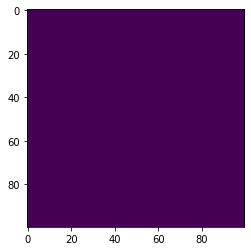

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

def fast_2d_poisson_solver(F):
    # ADD YOUR CODE HERE
    X = np.zeros_like(F)
    return X

## ALL THE CODE BELOW IS PROVIDED FOR YOU.

# A helper function you can use if you want
def dst(X,axis =0):
    return scipy.fft.dst(X, type = 1, norm = "ortho", axis =axis)

# Computes eigenvalues of the Tridiagonal matrix from known analytical formula
def get_eigenvalues_of_T(n):
    return 4 * (np.sin(np.arange(1,n+1) * np.pi / (2*( n + 1)))**2)

# Get the matrix explicitely, useful for debugging
def get_second_order_diff_matrix(n):
    T = np.diag(2 * np.ones(n)) + np.diag(-1 *  np.ones(n-1), k = 1) + np.diag(-1 * np.ones(n-1) , k = -1)
    return T

# Take f(x,y) = 1
n = 100
h = 1 / (n + 1)

F = np.ones((n,n)) * h**2


# O(n^3) way using your Bartles-Stewart code:
T = get_second_order_diff_matrix(n)
X = Bartels_Stewart(T, -T, F)
print('Bartels-Stewart error (if this doesnt work, fix previous question!)',np.linalg.norm(T @X + X@T - F) / np.linalg.norm(F))

# O(n^3) way using your Bartles-Stewart code:
X2 = fast_2d_poisson_solver(F)
#should be close to machine epsilon, ~1e-13 is good
print('Fast poisson solver', np.linalg.norm(T @X2 + X2@T - F) / np.linalg.norm(F))

plt.figure()
plt.imshow(X2)


## 4. Crafting the jewel 

We spent two weeks deriving one of the jewels of numerical linear algebra: the shifted-QR algorithm. Time to pull all the pieces together.
When applied to real symmetric matrices, the algorithm looks as follows.


> $Q_0 A^{(0)} Q_0 ^T = A \qquad $  (1) (Compute a reduction to tridiagonal by Householder Reflection)
>
> $M \leftarrow m$
>
>for $k = 1,2, \dots$
>
>> $\mu_k = A_{M,M}^{(k-1)} \qquad $  (Compute Rayleigh quotient) 
>>
>> $Q^{(k)}, R^{(k)} \leftarrow A^{(k-1)} - \mu_k I  \qquad $  (2) (Compute QR decomposition of the shifted matrix) 
>>
>> $A^{(k)}  \leftarrow R^{(k)} Q^{(k)} +  \mu_k I \qquad $ (3) (Recombine factors) 
>>
>> if $|A_{M,M-1}^{(k)} | < \text{tol}$: $\qquad  $  (4) (If converged to eigenvalue)
>>>
>>> Add $A_{M,M}^{(k)}$ to list of eigenvalues
>>>
>>> $A^{(k)} \leftarrow A^{(k)}_{[1:M-1, 1:M-1]}  \qquad $  (Deflate: ignore last row and column)
>>>
>>> $M \leftarrow  M-1$
>>> 
>> if $ M = 1: $   (The trivial 1x1 matrix case: the entry is the eigenvalue)
>>> Add $A_{1,1}^{(k)}$ to list of eigenvalues
>>>
>>> terminate
>
>end while

Step (1) was implemented in precept 7,

Step (2) - (3), could be done we could do it in O(m), but we will ignore this specific problem for now, and you can use `np.linalg.qr` instead, which performs that operation in $\mathcal{O}(m^3)$.

Step (4) is the deflation step. We check if we have converged to an eigenvalue.


As a result of the shifting we recover the $O(\epsilon^3)$ converge of the Rayleigh quotient. Thus, we expect to need only a handful of iterations per eigenvalues (3-4). 

Your task is to implement the shifted-QR algorithm above and keep track of how many QR iterations you are doing. Make sure that you only need $< 4 n$ QR iterations to compute all eigenvalues.


In [14]:
def shifted_QR_iteration(A, tol =1e-13):
    eigenvalues = []
    n_iters = 0 
    ## ADD YOUR CODE HERE


    while ():
        ## You can replace this loop, with whatever you want, but make sure you keep track of the number of iterations 
        # (specifically, the number of QR decomposition you are computing)
        n_iters +=1 

    eigenvalues = np.zeros(A.shape[0])
    return eigenvalues,  n_iters

n = 100
# A test case: a random symmetric matrix
A = np.random.randn(n,n)
A = A + A.T 

# Compute eigenvalues with built-in:
eigvals1 = np.linalg.eigvals(A)

# Compute with your code
eigvals2, n_iters = shifted_QR_iteration(A.copy())

# Check that the number eigenvalues are correct:
print('eigenvalue error:', np.max(np.sort(eigvals1) - np.sort(eigvals2)))

# Number of n_iters divided by n:
# Should be < 4
print('number of QR iterations per eigenvalues:', n_iters/n)

eigenvalue error: 27.343877642919818
number of QR iterations per eigenvalues: 0.0


Extra credit:

* Read the following paper, and implement three randomized numerical linear algebra algorithms https://arxiv.org/pdf/2002.01387.pdf . Perform some numerical experiments illustrating the bounds given.

* Write an $O(m)$ QR decomposition for tridiagonal matrices.